In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.13


# Análise Exploratória de Dados

In [2]:
# Importando os pacotes 
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Carregando o dataset
#df = pd.read_excel('TAT-SCRIPTS-HISTORICO-v3-2-QUINZENAL.xlsx', index_col=0)
df = pd.read_excel('TAT-SCRIPTS-HISTORICO-v3-4-QUINZENAL.xlsx', index_col=0)
#print(df.head())

In [4]:
# Lista todas as colunas e um pouco do dataset
print(df.describe())

          semana  scripts_feitos_no_periodo    pessoas   acumulado  \
count  12.000000                  12.000000  12.000000   12.000000   
mean    6.500000                  29.083333   1.583333  139.166667   
std     3.605551                  20.002083   0.514929  116.093875   
min     1.000000                   0.000000   1.000000    0.000000   
25%     3.750000                  13.500000   1.000000   40.500000   
50%     6.500000                  23.500000   2.000000  124.000000   
75%     9.250000                  45.250000   2.000000  230.000000   
max    12.000000                  66.000000   2.000000  338.000000   

       media_script_semanal_por_pessoa  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
count                        12.000000         0.0         0.0         0.0   
mean                         11.375000         NaN         NaN         NaN   
std                           7.888787         NaN         NaN         NaN   
min                           0.000000         NaN       

In [5]:
df

,semana,scripts_feitos_no_periodo,pessoas,data,acumulado,media_script_semanal_por_pessoa,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
index,,,,,,,,,,
1,1,0,1,2022-04-01,0,0.0,NaN,NaN,NaN,NaN
2,2,11,1,2022-05-25,11,3.0,NaN,NaN,NaN,NaN
3,3,12,1,2022-05-30,12,8.0,NaN,NaN,NaN,NaN
4,4,38,1,2022-06-15,50,19.0,NaN,NaN,NaN,NaN
5,5,27,1,2022-06-30,77,13.5,NaN,NaN,NaN,NaN
6,6,14,2,2022-07-18,91,3.5,NaN,NaN,NaN,NaN
7,7,66,2,2022-07-30,157,16.5,NaN,NaN,NaN,NaN
8,8,18,2,2022-08-14,175,4.5,NaN,NaN,NaN,NaN
9,9,50,2,2022-08-30,225,12.5,NaN,NaN,NaN,NaN


In [6]:
df.corr()['acumulado']

semana                             0.986664
scripts_feitos_no_periodo          0.622035
pessoas                            0.830063
acumulado                          1.000000
media_script_semanal_por_pessoa    0.650297
Unnamed: 7                              NaN
Unnamed: 8                              NaN
Unnamed: 9                              NaN
Unnamed: 10                             NaN
Name: acumulado, dtype: float64

In [7]:
acumulado = df['acumulado']

In [8]:
# AS VEZES TEMOS A NECESSIDADE DE RETIRAR COLUNAS VAZIAS
df = df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)

In [9]:
df = df.drop(['data'], axis=1)

In [10]:
df['acumulado'] = acumulado

In [11]:
df

,semana,scripts_feitos_no_periodo,pessoas,acumulado,media_script_semanal_por_pessoa
index,,,,,
1,1,0,1,0,0.0
2,2,11,1,11,3.0
3,3,12,1,12,8.0
4,4,38,1,50,19.0
5,5,27,1,77,13.5
6,6,14,2,91,3.5
7,7,66,2,157,16.5
8,8,18,2,175,4.5
9,9,50,2,225,12.5


Ajustando a média quinzenal em 'media_script_semanal_por_pessoa'

In [12]:
df['media_script_semanal_por_pessoa'] = df['media_script_semanal_por_pessoa'] * 2

In [13]:
df

,semana,scripts_feitos_no_periodo,pessoas,acumulado,media_script_semanal_por_pessoa
index,,,,,
1,1,0,1,0,0.0
2,2,11,1,11,6.0
3,3,12,1,12,16.0
4,4,38,1,50,38.0
5,5,27,1,77,27.0
6,6,14,2,91,7.0
7,7,66,2,157,33.0
8,8,18,2,175,9.0
9,9,50,2,225,25.0


# Plot Inicial

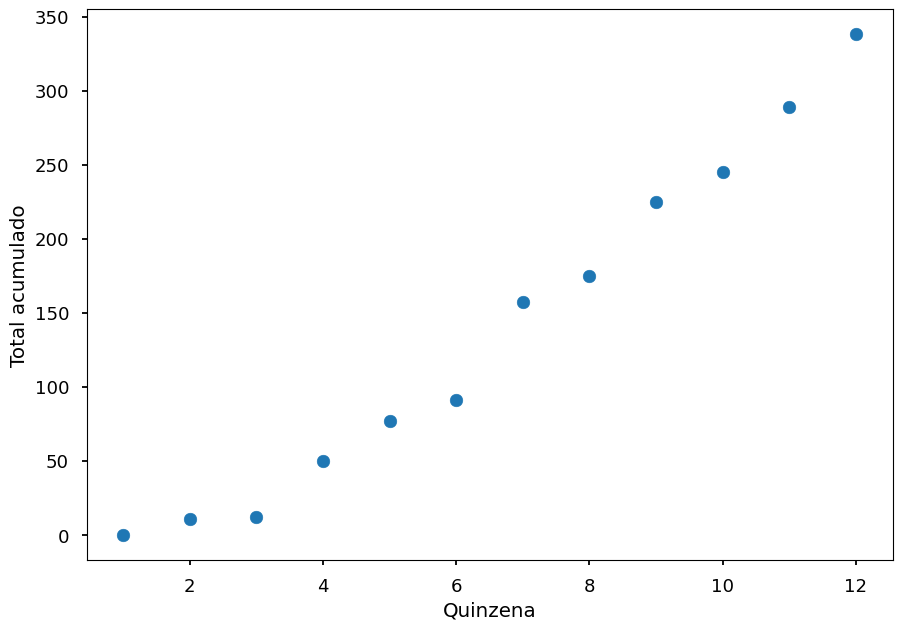

In [14]:
plt.scatter(df['semana'], df['acumulado'])
plt.xlabel('Quinzena')
plt.ylabel('Total acumulado')
plt.show()

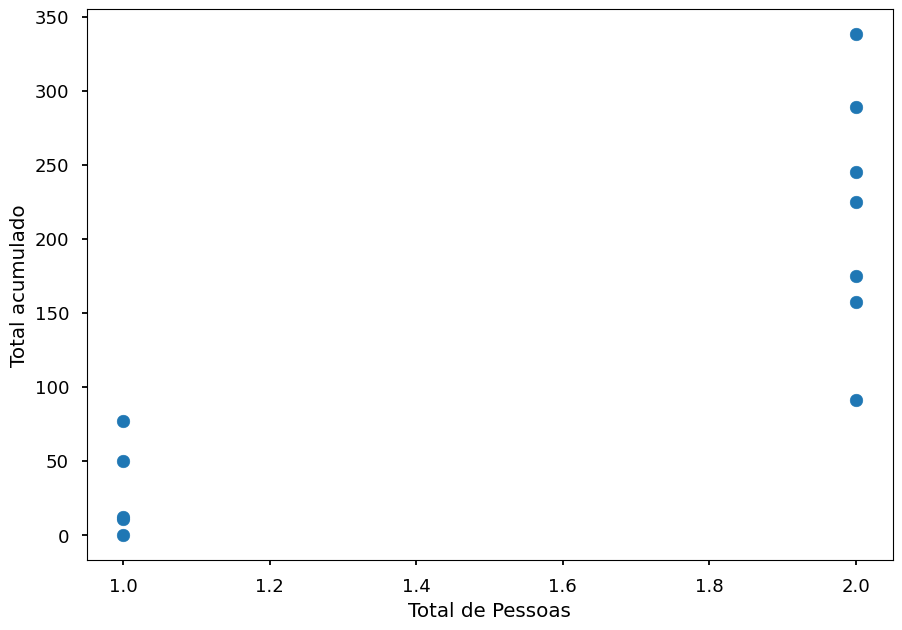

In [15]:
plt.scatter(df['pessoas'], df['acumulado'])
plt.xlabel('Total de Pessoas')
plt.ylabel('Total acumulado')
plt.show()

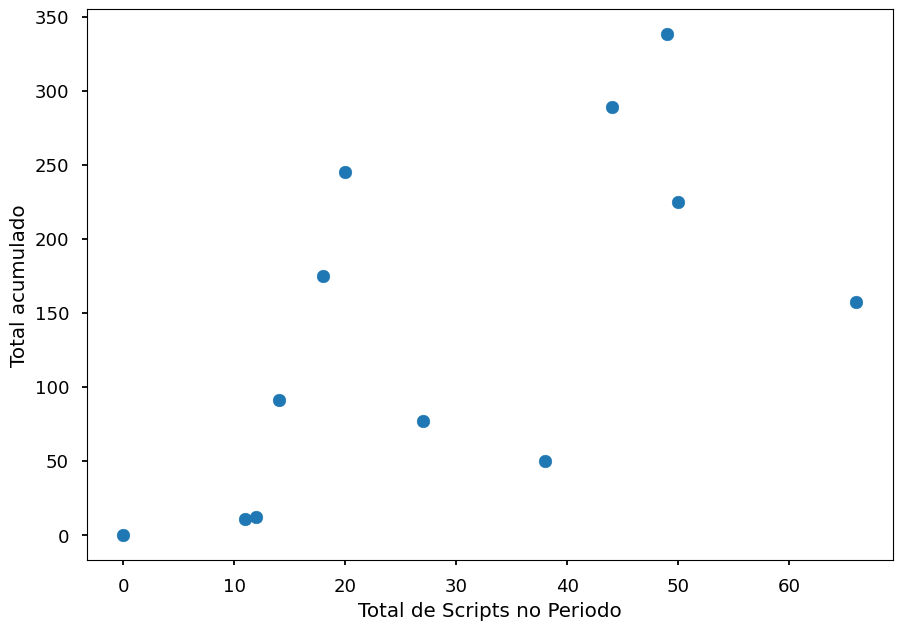

In [16]:
plt.scatter(df['scripts_feitos_no_periodo'], df['acumulado'])
plt.xlabel('Total de Scripts no Periodo')
plt.ylabel('Total acumulado')
plt.show()

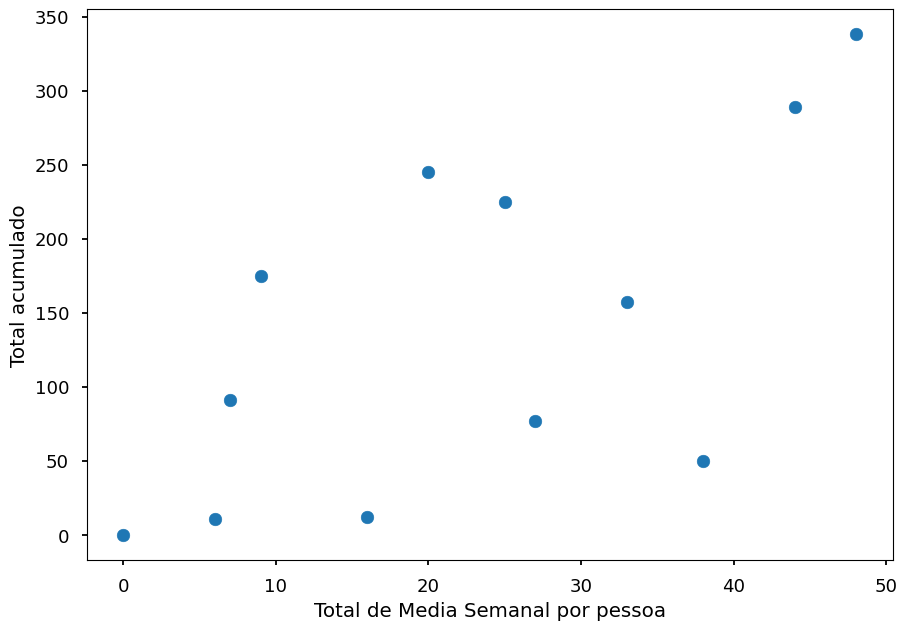

In [17]:
plt.scatter(df['media_script_semanal_por_pessoa'], df['acumulado'])
plt.xlabel('Total de Media Semanal por pessoa')
plt.ylabel('Total acumulado')
plt.show()

# Predição

In [18]:
import sklearn as sk

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Seleção de variáveis preditoras (Feature Selection)
#atributos = ['semana', 'pessoas','scripts_feitos_no_periodo']
atributos = ['semana', 'pessoas','media_script_semanal_por_pessoa','scripts_feitos_no_periodo']
#atributos = ['semana']

In [21]:
# Variável a ser prevista
atrib_prev = ['acumulado']

In [22]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [23]:
X

array([[ 1.,  1.,  0.,  0.],
       [ 2.,  1.,  6., 11.],
       [ 3.,  1., 16., 12.],
       [ 4.,  1., 38., 38.],
       [ 5.,  1., 27., 27.],
       [ 6.,  2.,  7., 14.],
       [ 7.,  2., 33., 66.],
       [ 8.,  2.,  9., 18.],
       [ 9.,  2., 25., 50.],
       [10.,  2., 20., 20.],
       [11.,  2., 44., 44.],
       [12.,  2., 48., 49.]])

In [24]:
# Definindo a taxa de split
split_test_size = 0.30

In [25]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 0)

In [26]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

66.67% nos dados de treino
33.33% nos dados de teste


In [27]:
X_treino

array([[ 3.,  1., 16., 12.],
       [ 9.,  2., 25., 50.],
       [ 2.,  1.,  6., 11.],
       [ 8.,  2.,  9., 18.],
       [10.,  2., 20., 20.],
       [ 4.,  1., 38., 38.],
       [ 1.,  1.,  0.,  0.],
       [ 6.,  2.,  7., 14.]])

In [28]:
X_teste

array([[ 7.,  2., 33., 66.],
       [12.,  2., 48., 49.],
       [ 5.,  1., 27., 27.],
       [11.,  2., 44., 44.]])

In [29]:
Y_treino

array([[ 12],
       [225],
       [ 11],
       [175],
       [245],
       [ 50],
       [  0],
       [ 91]], dtype=int64)

In [30]:
Y_teste

array([[157],
       [338],
       [ 77],
       [289]], dtype=int64)

# Regressão Linear - Início - Análise e Metricas Iniciais

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
from sklearn import metrics

In [33]:
reg = LinearRegression().fit(X_treino, Y_treino)

In [34]:
reg.score(X_treino, Y_treino) # 

0.9841847582603153

In [35]:
reg.coef_

array([[ 43.08632331, -96.95554305,  -3.19644023,   1.53739455]])

In [36]:
reg.intercept_

array([31.99107145])

In [37]:
y_pred = reg.predict(X_teste)

In [38]:
y_pred

array([[135.66976081],
       [277.0190666 ],
       [105.67291138],
       [239.0315315 ]])

In [39]:
Y_teste

array([[157],
       [338],
       [ 77],
       [289]], dtype=int64)

# Mais Métricas - Acurácia (Exatidão do Modelo) ou  Score

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [41]:
score1 = metrics.r2_score(Y_teste, y_pred ) #coeficiente de determinação, entre 0 e 1, onde proximo a 1 melhor, mas nao garantia

In [42]:
print('r2 score is',score1)  ## Sendo > que 0.8 é um modelo eficiente (acurácia)

r2 score is 0.8258042781872654


In [43]:
print('mean_sqrd_error is==',mean_squared_error(Y_teste,y_pred))
print('oot_mean_squared error of is==',np.sqrt(mean_squared_error(Y_teste,y_pred)))

mean_sqrd_error is== 1873.159258350174
oot_mean_squared error of is== 43.28000991624394


In [44]:
metrics.mean_absolute_error(Y_teste, y_pred ) #erro médio absoluto. Mais proximo a zero melhor.

40.23813811729148

# Calculo inicial da predição

In [45]:
for k in range(len(Y_teste)):
    Y_test = Y_teste[k]
    Y_previsto = y_pred[k]
    erro = abs((Y_teste[k] - y_pred[k]) / y_pred[k]*100)
    print("Y_test : " + str(Y_test) )
    print("Y_previsto : " + str(Y_previsto) )
    print("erro : " + str(erro) )
    print("=============")

Y_test : [157]
Y_previsto : [135.66976081]
erro : [15.72217645]
Y_test : [338]
Y_previsto : [277.0190666]
erro : [22.01326217]
Y_test : [77]
Y_previsto : [105.67291138]
erro : [27.13364382]
Y_test : [289]
Y_previsto : [239.0315315]
erro : [20.90455104]


In [46]:
reg.predict(np.array([[13, 1, 10,20]]))
#reg.predict(np.array([[18]]))

array([[493.94121998]])

# Verificando a significancia estatistica das variaveis

In [47]:
import statsmodels.api as sm
X_opt = X[:,[0,1,2,3]]
regressos_OLS = sm.OLS(Y,X_opt).fit()
regressos_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              183.4
Date:                Tue, 18 Oct 2022   Prob (F-statistic):                    6.72e-08
Time:                        08:15:28   Log-Likelihood:                         -52.041
No. Observations:                  12   AIC:                                      112.1
Df Residuals:                       8   BIC:                                      114.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            42.6134      4.307      9.894      0.000      32.681      52.546
x2           -78.5884     16.579     -4.740      0.001    -116.820     -40.357
x3            -1.9761      0.906     -2.181      0.061      -4.065       0.113
x4             1.1180      0.682      1.639      0.140      -0.455       2.691
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.281
Skew:                           0.327   Prob(JB):                        0.869
Kurtosis:                       2.633   Cond. No.                         115.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
regressos_OLS.pvalues

array([9.19340891e-06, 1.46358314e-03, 6.07658952e-02, 1.39768542e-01])

In [49]:
import statsmodels.api as sm
X_opt = X[:,[0,1,2]]
regressos_OLS = sm.OLS(Y,X_opt).fit()
regressos_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              205.1
Date:                Tue, 18 Oct 2022   Prob (F-statistic):                    1.33e-08
Time:                        08:15:29   Log-Likelihood:                         -53.778
No. Observations:                  12   AIC:                                      113.6
Df Residuals:                       9   BIC:                                      115.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            40.9091      4.555      8.981      0.000      30.605      51.213
x2           -66.7168     16.252     -4.105      0.003    -103.482     -29.952
x3            -0.8203      0.620     -1.323      0.219      -2.223       0.583
==============================================================================
Omnibus:                        0.742   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.595
Skew:                          -0.019   Prob(JB):                        0.743
Kurtosis:                       1.910   Cond. No.                         66.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
regressos_OLS.pvalues

array([8.68368894e-06, 2.65637585e-03, 2.18537870e-01])

# Salvando o modelo Treinado para usar mais tarde

In [51]:
import pickle

In [52]:
filename = 'modelo_treinado_v1.sav'
pickle.dump(reg, open(filename, 'wb'))

# Carregando o modelo e fazendo previsão com novos conjuntos de dados

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))

In [54]:
X_teste

array([[ 7.,  2., 33., 66.],
       [12.,  2., 48., 49.],
       [ 5.,  1., 27., 27.],
       [11.,  2., 44., 44.]])

In [55]:
resultado1 = loaded_model.predict(X_teste)
print(resultado1)

[[135.66976081]
 [277.0190666 ]
 [105.67291138]
 [239.0315315 ]]


# Conclusões

a) O modelo usado ao qual se adapta a realidade é Regressão Linear Multipla, por mais de uma variavel suporta o modelo, e tem comportamento Linear
Obs: 
- Regressão Linear Simples: Y = aX + b 
- Regressão Linear Multipla: Y = a1 X1 + a2 X2 + ... + b
- Acurácia é de 84%

b) Modelo com 4 variaveis é valido e é esse. Se tirar uma piora
c) P>|t| no 1o modelo com 4 variaveis é proximo a zero (0.000)
d) Quanto mais o tempo passa, maior qtde acumulada, menor o erro do modelo

Fim da Analise

https://www.linx.com.br

# Fim

### Obrigado

### Visite a Linx - <a href="http://linx.com.br">Site da Linx</a>